# Imdb Reviews Classification

## Check Tensorflow Version

In [0]:
import tensorflow as tf

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
tf.__version__

'1.9.0-rc1'

## Imports

In [0]:
from tensorflow import keras
from tensorflow.python.keras.datasets import imdb

## Load Imdb dataset

In [8]:
# Use top 10000 frequently used words from the dataset only, discard the rest
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [9]:
train_data.shape

(25000,)

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels.shape

(25000,)

In [12]:
train_labels[0]

1

In [13]:
wrdtoidx = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [0]:
idxtowrd = dict([(value, key) for (key, value) in wrdtoidx.items()])

In [0]:
sample_review = ' '.join([idxtowrd.get(idx) for idx in train_data[0]])

In [16]:
sample_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Data Preparation

In [0]:
import numpy as np

In [0]:
def one_hot_encoder(samples, no_features):
  output_tensor = np.zeros((len(samples), no_features))
  for idx, sample in enumerate(samples):
    output_tensor[idx, sample] = 1
  return output_tensor

In [0]:
x_train = one_hot_encoder(train_data, 10000)
x_test = one_hot_encoder(test_data, 10000)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model

In [0]:
model = keras.models.Sequential()

In [0]:
model.add(keras.layers.Dense(16, activation= 'relu',input_shape = (10000,)))

In [0]:
model.add(keras.layers.Dense(16, activation= 'relu'))

In [0]:
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Create a dummy validation set

In [0]:
x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

In [0]:
y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

## Train model using training data set

In [29]:
history = model.fit(x_train_set,
          y_train_set,
          epochs=20,
          batch_size=512,
          validation_data=(x_val_set, y_val_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.5441 - acc: 0.7849 - val_loss: 0.4245 - val_acc: 0.8568
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.3385 - acc: 0.8963 - val_loss: 0.3224 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2463 - acc: 0.9207 - val_loss: 0.2851 - val_acc: 0.8898
Epoch 4/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1927 - acc: 0.9367 - val_loss: 0.2734 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1557 - acc: 0.9495 - val_loss: 0.2735 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1305 - acc: 0.9589 - val_loss: 0.2883 - val_acc: 0.8875
Epoch 7/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1062 - acc: 0.9691 - val_loss: 0.3000 - val_ac

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plot the training and validation loss and accuracy

In [0]:
import matplotlib.pyplot as plt

In [0]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1, len(train_acc) + 1)

Text(0,0.5,'Loss')

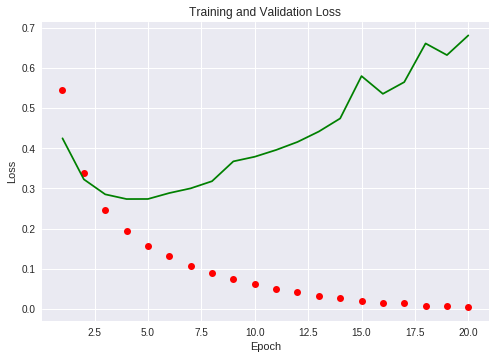

In [34]:
plt.plot(epochs, train_loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Accuracy')

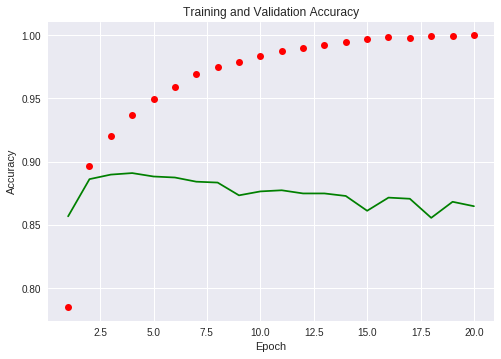

In [36]:
plt.clf()
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## Retrain the entire model for 3 epochs

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 2s 62us/step - loss: 0.4883 - acc: 0.7925
Epoch 2/3
25000/25000 [==============================] - 1s 54us/step - loss: 0.2790 - acc: 0.9056
Epoch 3/3
25000/25000 [==============================] - 3s 113us/step


In [40]:
results

[0.2985367108249664, 0.88192]

## Predict on test set

In [41]:
model.predict(x_test)

array([[0.3072699 ],
       [0.9999734 ],
       [0.9881009 ],
       ...,
       [0.24560508],
       [0.20542961],
       [0.6527755 ]], dtype=float32)